In [1]:
import numpy as np
import json
from os import listdir
from os.path import isfile, join
import matplotlib as plt
from sklearn.neighbors import NearestNeighbors
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#prints out all the filepaths for the images

# PATH_IMG = u'/root/Etsy-sov/SBIR_regression/lampshades_images/images_8_27'
# PATH_IMG = u'lampshades_images/images_8_27'
PATH_IMG = u'npy_9_8/images_9_8/' # PATH TO DIR WITH NUMPY FILES

filepaths = []
for subdir, dirs, files in os.walk(PATH_IMG):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".npy"):
            #print (filepath)
            filepaths.append(filepath)
            
jpg_of_images = []
for thing in filepaths:
    jpg_of_images.append(thing[0:-7])
            
#just the numpy arrays
just_numpy_arrays_images = []
for thing in jpg_of_images:
    just_numpy_arrays_images.append(np.load("{}_np.npy".format(thing)))

In [3]:
# test_data=np.array(just_numpy_arrays_images)

data = np.array(just_numpy_arrays_images)
print('# of images: ', len(data)) # 34880, 256

# of images:  34880


### Dendrogram

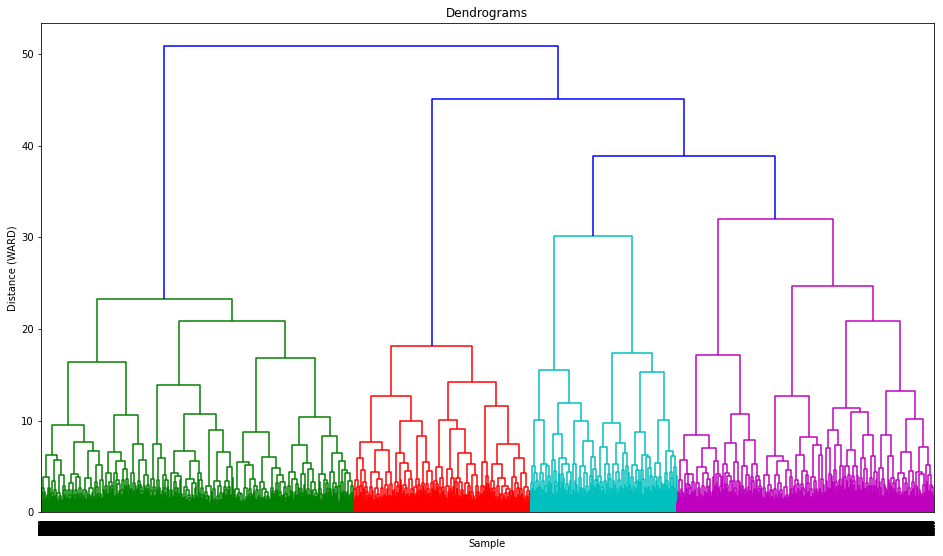

In [6]:
### Divisive Hierarchal Clustering
import sys
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage

data_scaled = normalize(data)
linked = linkage(data_scaled, 'ward') # ward minimizes variant between clusters

plt.figure(figsize=(16, 9))  
plt.title("Dendrograms")  
plt.ylabel("Distance (WARD)")
plt.xlabel("Sample")
dend = dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
)

plt.show();

### Truncated Dendrogram

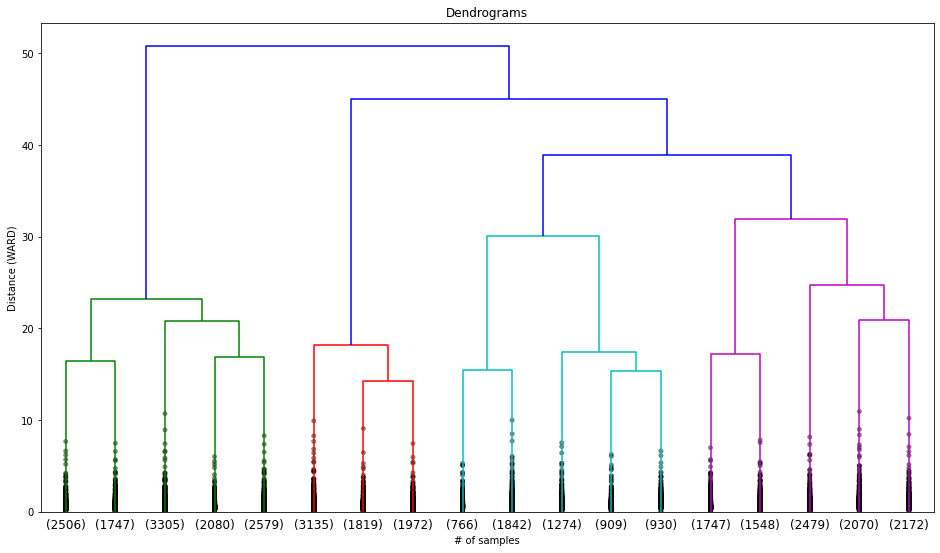

In [7]:
plt.figure(figsize=(16, 9))  
plt.title("Dendrograms")  
plt.ylabel("Distance (WARD)")
plt.xlabel("# of samples")
dend = dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    truncate_mode='lastp',
    p=18, # above 18
    show_contracted=True
)

plt.show();

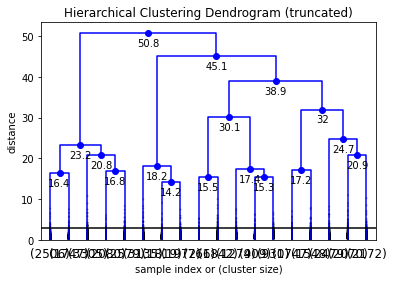

In [8]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

fancy_dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    truncate_mode='lastp',
    p=18,
    show_contracted=True,
    max_d=20
    
)
plt.show();

### Elbow Plot

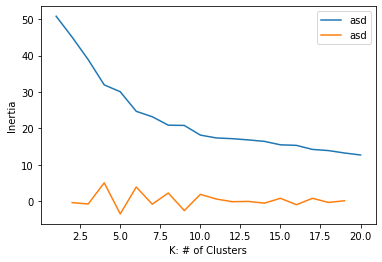

clusters: 4


In [9]:
Z = linked
last = Z[-20:, 2] # Z[# of clusters:,]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.ylabel('Inertia')
plt.xlabel('K: # of Clusters')
plt.legend(['asd','asd'])
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print( "clusters:", k)

# inertia gradually decreasing less indicates less information gain

### Clusters, Silhouettes, Centroids

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score

data = np.array(just_numpy_arrays_images)

def the_function(data, n_clusters):
    """
    Cluster
    Pairwise
    Label
    """

    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    centroids = kmeans.cluster_centers_ # 18 clusters, 256 features
    closest, _distance = pairwise_distances_argmin_min(kmeans.cluster_centers_, data)
    label = kmeans.predict(data)
    print("Silhouette Score(n={}): {}".format(n_clusters, silhouette_score(data, label)))
    return kmeans, centroids, closest


kmeans, centroids, closest = the_function(data_scaled, 18)    

Silhouette Score(n=18): 0.04987525939941406


In [22]:
# NEED TO FIX IMAGE PATH
def get_centroids(jpg_of_images, closest):
    for index in closest:
        X = jpg_of_images[index]
        display(Image(filename='{}'.format(X)))


get_centroids(jpg_of_images, closest)

npy_9_8/images_9_8/4b10a0/2180982008/il_fullxfull.2180982008_ci5x.jpg
npy_9_8/images_9_8/d36b1e/2494621825/il_fullxfull.2494621825_8zim.jpg
npy_9_8/images_9_8/c9c44d/2042466256/il_fullxfull.2042466256_alv1.jpg
npy_9_8/images_9_8/758804/1767388962/il_fullxfull.1767388962_ai4n.jpg
npy_9_8/images_9_8/8955b3/436444286/il_fullxfull.436444286_aa74.jpg
npy_9_8/images_9_8/304352/2491862100/il_fullxfull.2491862100_6hwl.jpg
npy_9_8/images_9_8/64365d/1979807239/il_fullxfull.1979807239_p4f3.jpg
npy_9_8/images_9_8/a71285/1817578816/il_fullxfull.1817578816_f2zc.jpg
npy_9_8/images_9_8/fcae7a/2306788761/il_fullxfull.2306788761_nweu.jpg
npy_9_8/images_9_8/446f4a/2209429872/il_fullxfull.2209429872_tna0.jpg
npy_9_8/images_9_8/52d098/2242044179/il_fullxfull.2242044179_jn60.jpg
npy_9_8/images_9_8/ccac13/1111166289/il_fullxfull.1111166289_6l27.jpg
npy_9_8/images_9_8/6ebb21/2419944529/il_fullxfull.2419944529_1vvp.jpg
npy_9_8/images_9_8/492f04/785540053/il_fullxfull.785540053_ieev.jpg
npy_9_8/images_9_8/0ade6

For n_clusters = 2 The average silhouette_score is : 0.12161119
For n_clusters = 3 The average silhouette_score is : 0.08158555
For n_clusters = 4 The average silhouette_score is : 0.07204923
For n_clusters = 5 The average silhouette_score is : 0.075283945
For n_clusters = 6 The average silhouette_score is : 0.08083974
For n_clusters = 7 The average silhouette_score is : 0.07237931
For n_clusters = 8 The average silhouette_score is : 0.06770909
For n_clusters = 9 The average silhouette_score is : 0.06663461
For n_clusters = 10 The average silhouette_score is : 0.058805604
For n_clusters = 11 The average silhouette_score is : 0.05901852
For n_clusters = 12 The average silhouette_score is : 0.060034424
For n_clusters = 13 The average silhouette_score is : 0.060413044
For n_clusters = 14 The average silhouette_score is : 0.052661587
For n_clusters = 15 The average silhouette_score is : 0.05187862
For n_clusters = 16 The average silhouette_score is : 0.049195573
For n_clusters = 17 The ave

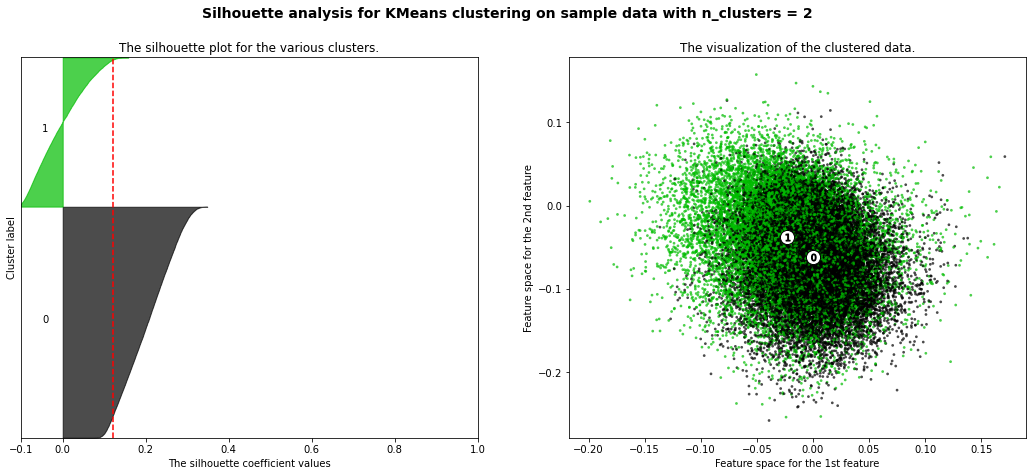

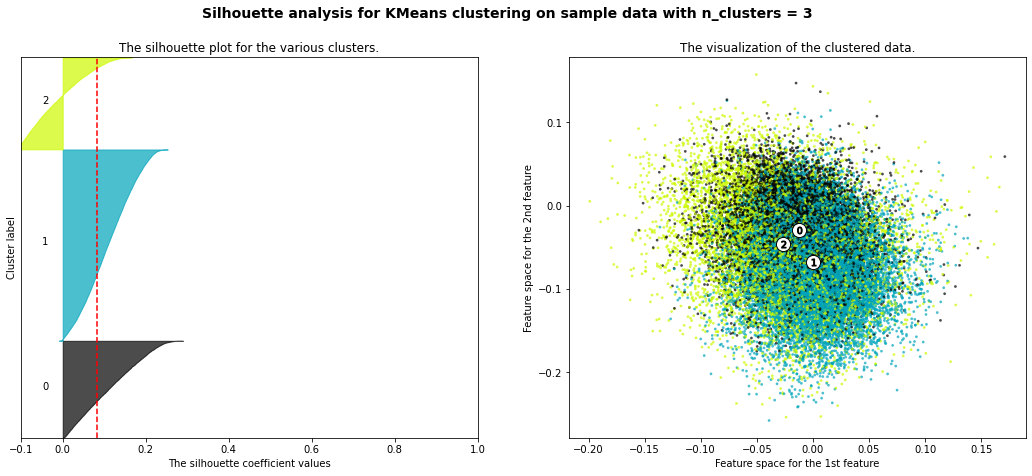

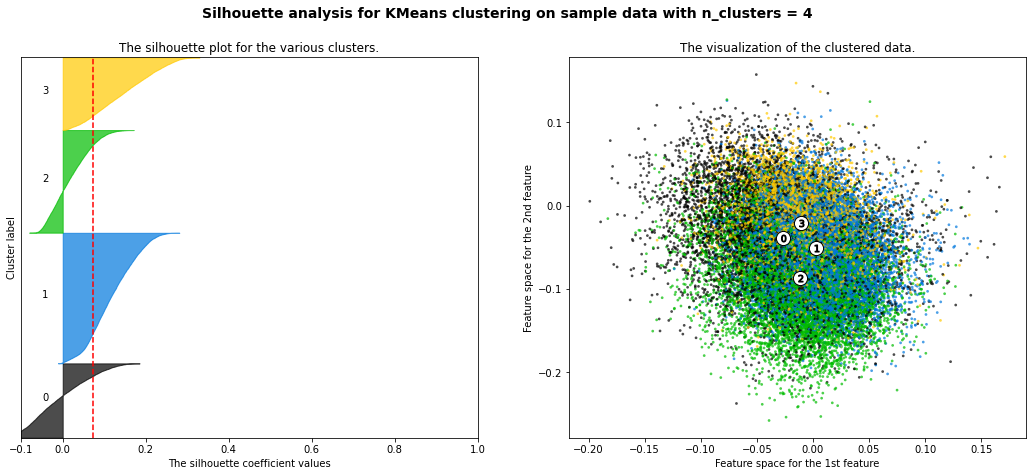

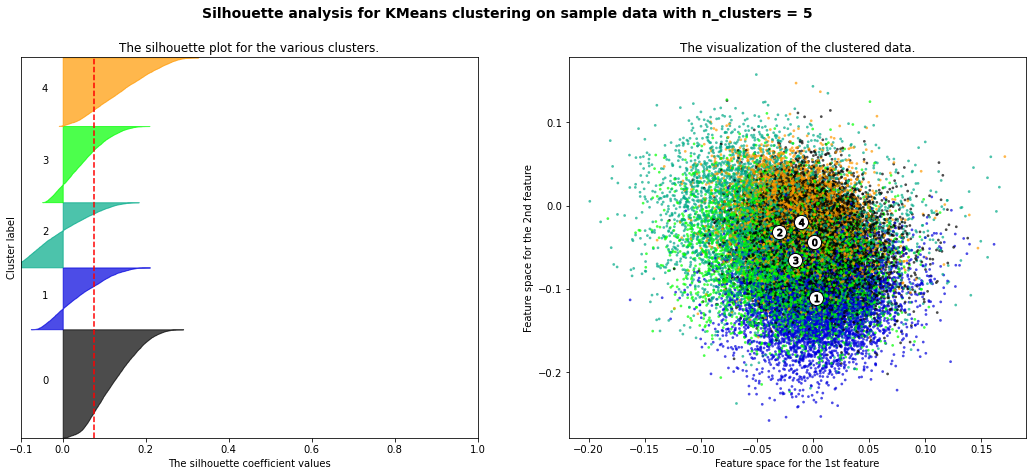

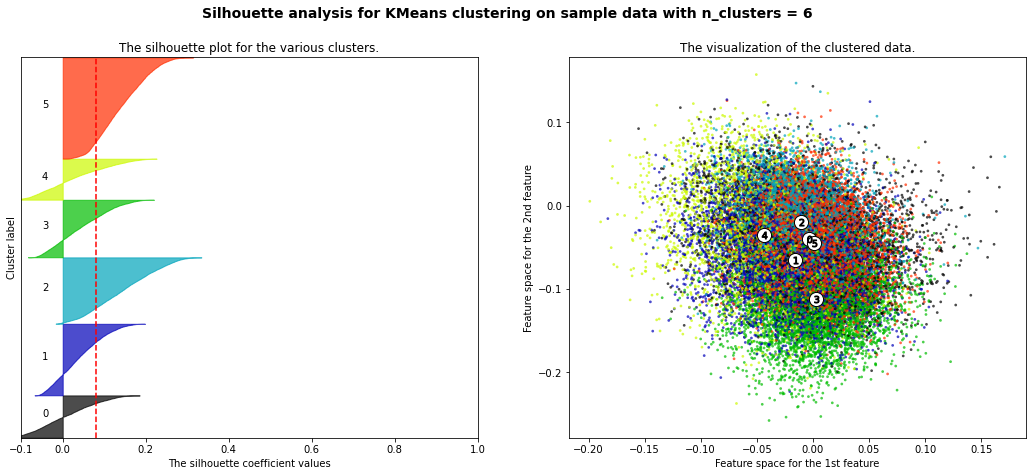

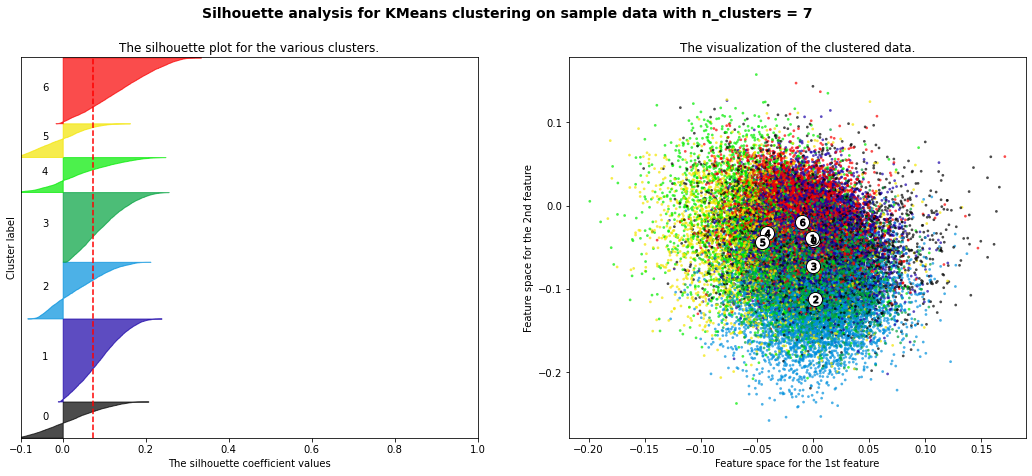

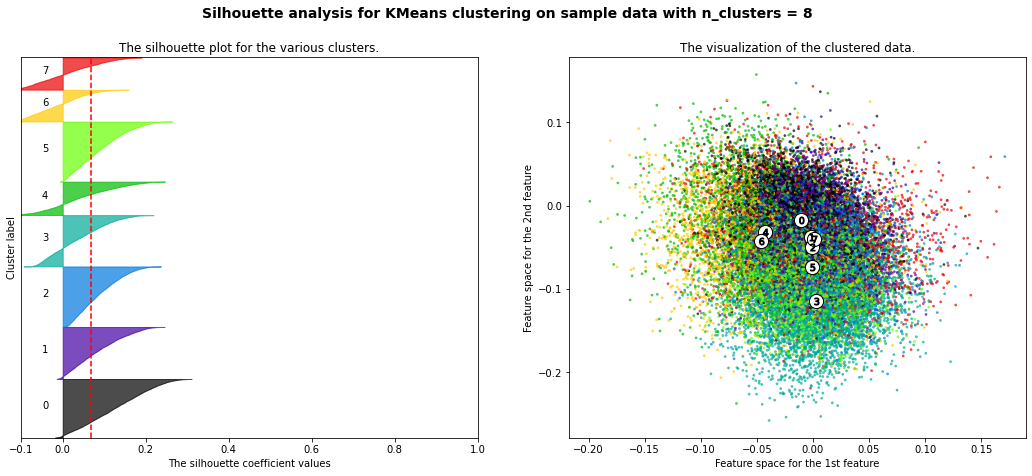

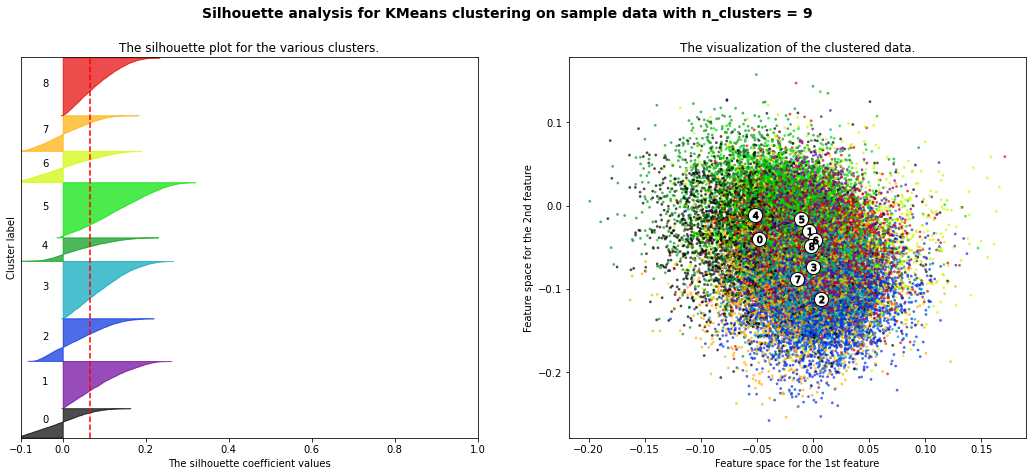

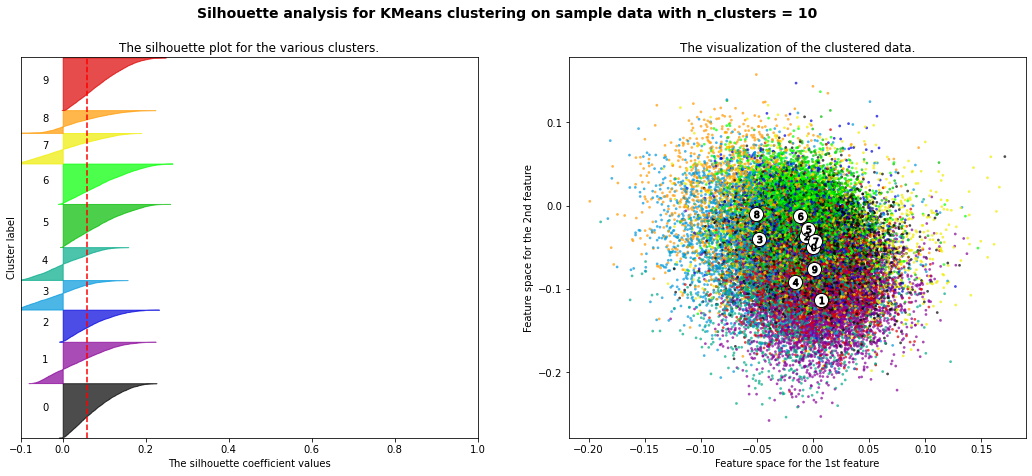

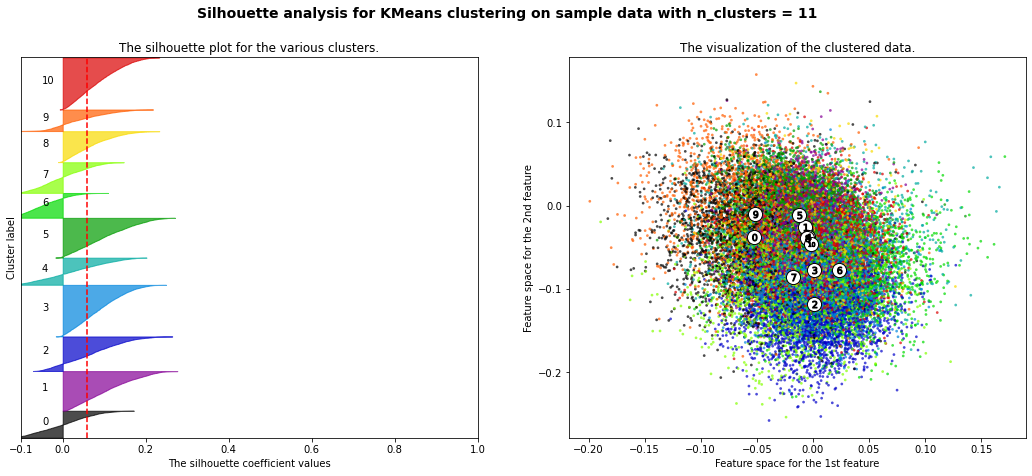

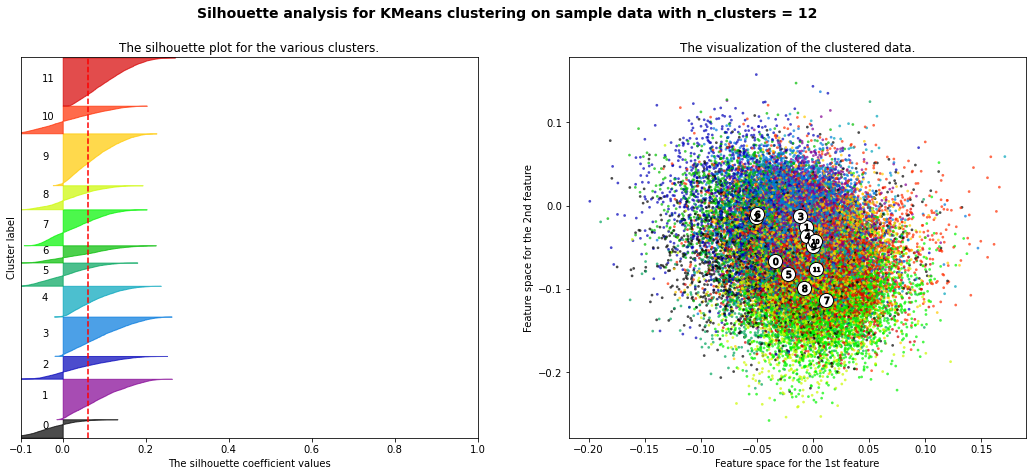

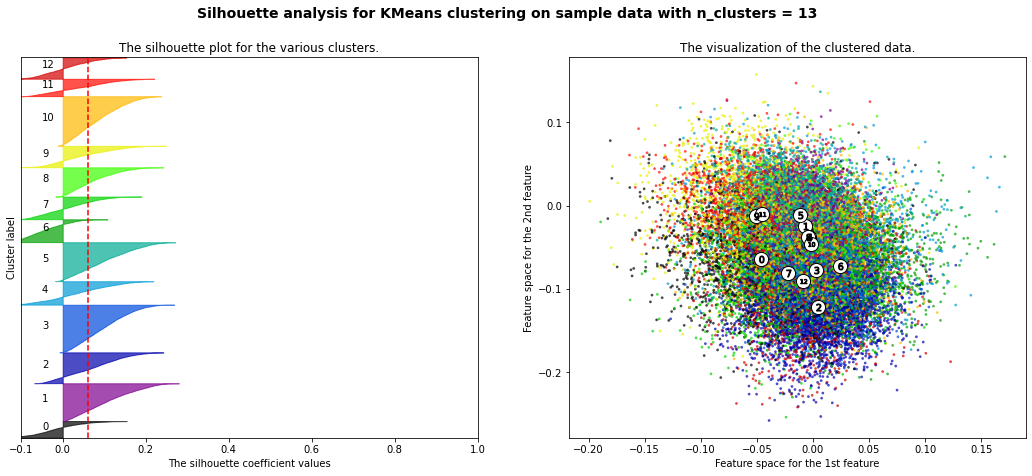

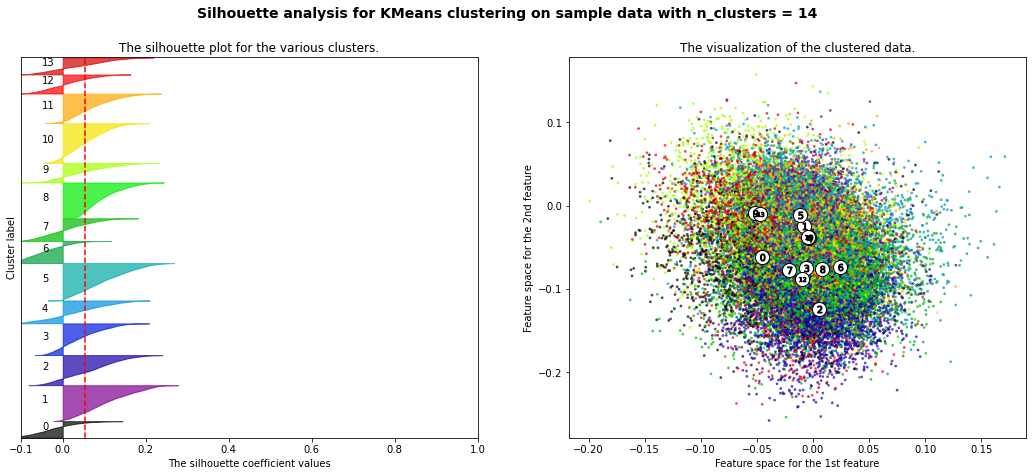

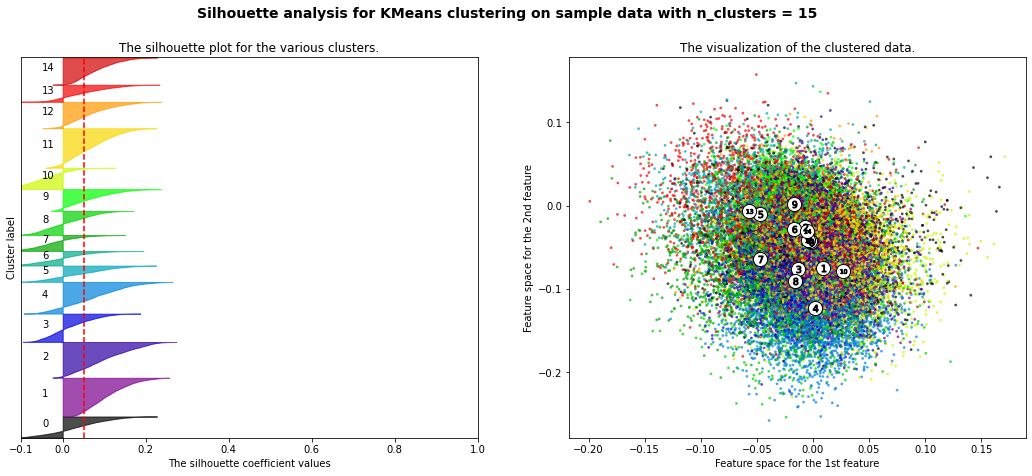

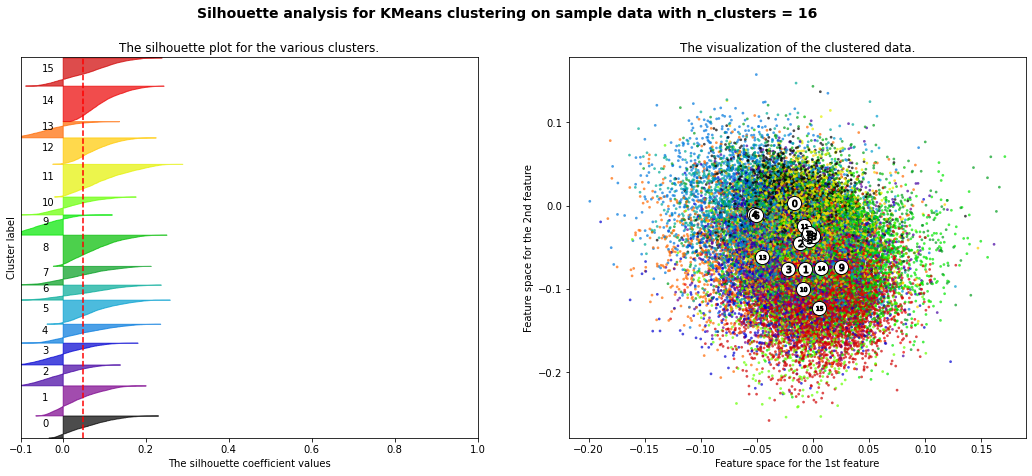

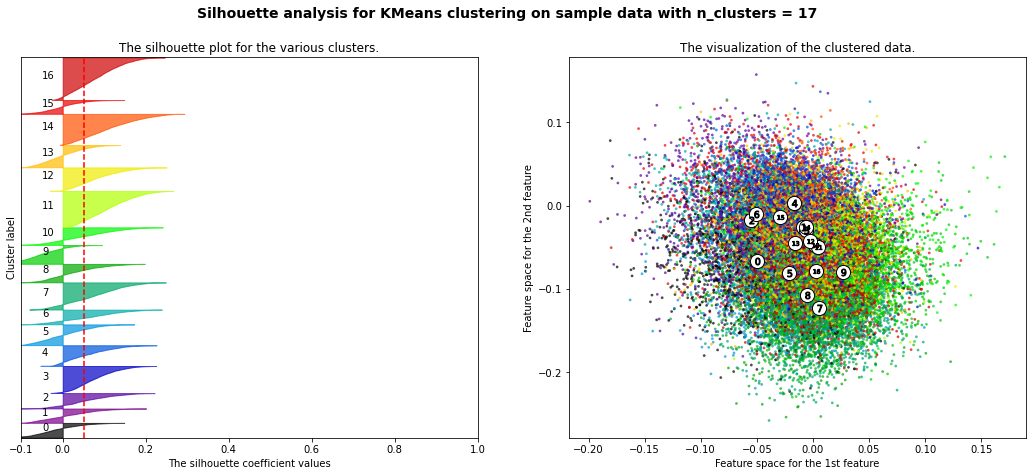

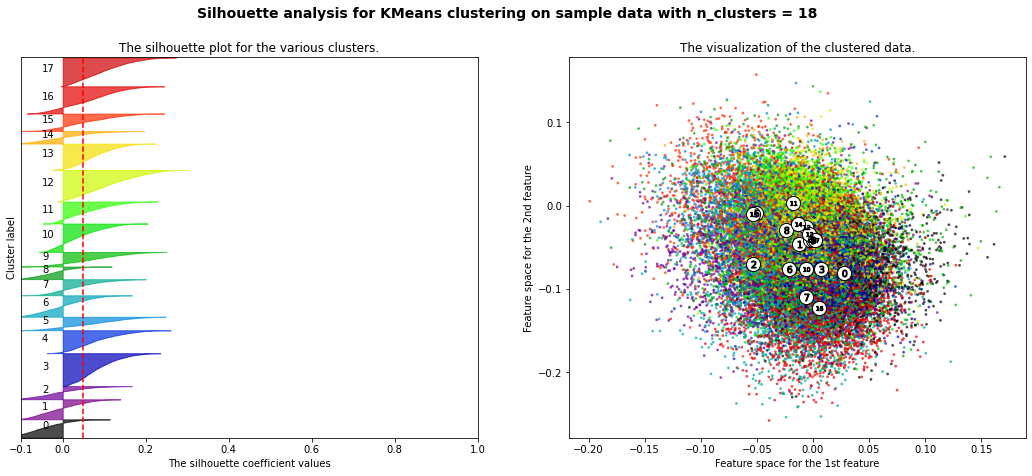

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

X = data_scaled
range_n_clusters = list(range(2,19))

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### tSNE and PCA

In [15]:
from time import time

from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)

X = data_scaled
n_samples, n_features = X.shape

kmeans = KMeans(n_clusters=18, random_state=0).fit(data_scaled)
centroids = kmeans.cluster_centers_ # 10 clusters, 256 features

Computing PCA projection
Computing t-SNE embedding


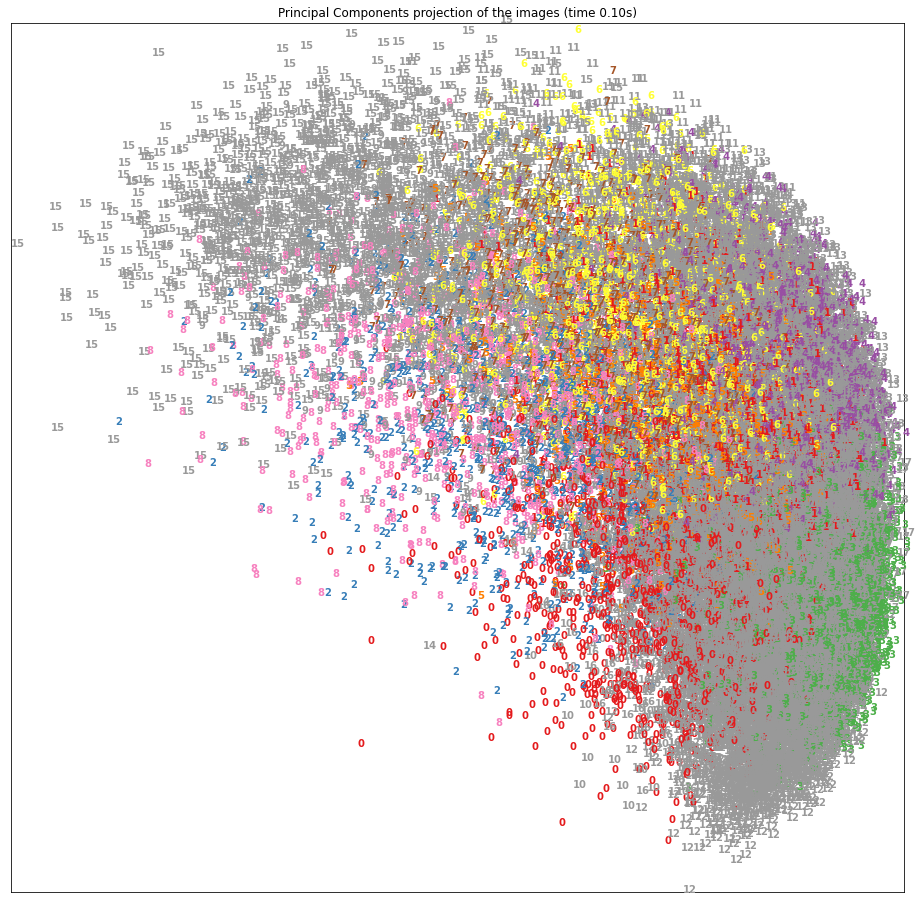

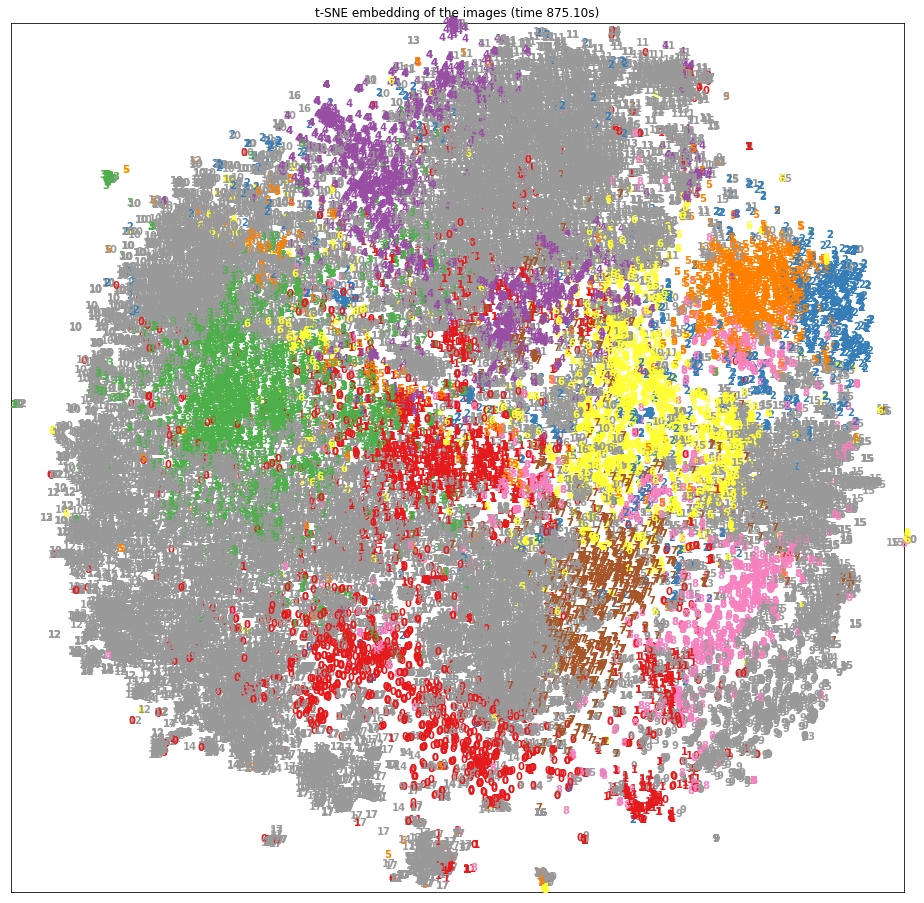

In [16]:
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)  
    plt.figure(figsize=(16,16))
    ax = plt.subplot(111)

    for i in range(X.shape[0]-1): # X.shape = 2186, 2

        plt.text(X[i, 0], X[i, 1], 
                 str(kmeans.labels_[i]), # LEN 2186
                 color=plt.cm.Set1(kmeans.labels_[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 10})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#----------------------------------------------------------------------

## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the images (time %.2fs)" %
               (time() - t0))
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the images (time %.2fs)" %
               (time() - t0))
plt.show()